* This is traning to predict trend N days forward in linear manner. We predicting linear trend slope 20 days ahead and train on "y=20 day linear regression ahead".  
* See LSTM_TRAIN_LSTM_price.ipynb for 1 day price preds.

In [1]:
import logging
import tensorflow as tf

from src.common.logs import setup_logging
from src.models_service.models_service import TensorflowModelTuningService as TFMTS
from env import Env


logger = setup_logging(logger_name=__name__,
                        console_level=logging.INFO, 
                        log_file_level=logging.INFO)

config = {
    'AV': {
        'key': '',
        'ticker': 'VGT',
        'outputsize': 'full',
        'key_adjusted_close': 'Adj Close',
        'key_volume': 'Volume',
    },
    'data': {
        'test_size': 0.05,
    }, 
    'model': {
        'name': 'LSTM_trend_20',
        'type': 'trend',
        'trend_prediction_window': 20,
        'window': [20],
        'shuffle_buffer_size' : [1], # In % from dataset len. https://www.tensorflow.org/api_docs/python/tf/data/Dataset#shuffle
        'batch_size' : [128],
        'epochs' : [1500],
# ----------------------------------
        'optimizer': 'adam',
        'loss': 'huber_loss',
        'metrics': ['mae', 'mse'],
    },
    'plots': {
        'loss_zoom': 0.9,
        'show': False,
        'buy_sell_signal': False,
    },
}

2023-11-19 01:29:59.335362: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-19 01:29:59.335450: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-19 01:29:59.335486: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-19 01:29:59.344071: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Grig Search

* When we traine model it is trained on yesterdays (close-1) data to predict todays close.  
In reality we use training data which is  some time in the past. But the idea is the same:   

<center><b> We use (-1t) features to train (0t) Closing Price. </b></center>

* Then we predict Todays close price using yesterdays data.  
* This means on the chart which we see and use in files PREDICT_LSTM_NFeatures.ipynb and _TRAIN_LSTM_NFeatures.ipynb and saved pictures we use yesturday's data to predict todays close price and plotting todays close price and prediction.   
<center><b>  BUT FEATURES FROM TODAY ARE NOT USED IN PREDICTION </b></center>

* So we can use today's closing data to predict tomorrows close price. That is what we do int app.py. We don't shift data since we don;t need to train model. We just data as is meaning today's input predicts tomorrows close price - (t0) predicts (t1).

2023-11-19 01:30:03.430680: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-19 01:30:03.445007: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-19 01:30:03.445080: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-19 01:30:03.447346: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-19 01:30:03.447400: I tensorflow/compile

Epoch 1/1500


2023-11-19 01:30:21.198912: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8600
2023-11-19 01:30:22.762303: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f29dc0a0b70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-19 01:30:22.762354: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2023-11-19 01:30:22.770273: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-19 01:30:22.870535: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


37/37 [==============================] - 8s 21ms/step - loss: 0.2011 - mae: 0.5621 - mse: 0.4036
Epoch 2/1500
37/37 [==============================] - 2s 21ms/step - loss: 0.1975 - mae: 0.5543 - mse: 0.3968
Epoch 3/1500
37/37 [==============================] - 1s 18ms/step - loss: 0.1974 - mae: 0.5568 - mse: 0.3964
Epoch 4/1500
37/37 [==============================] - 1s 19ms/step - loss: 0.1961 - mae: 0.5538 - mse: 0.3938
Epoch 5/1500
37/37 [==============================] - 1s 20ms/step - loss: 0.1952 - mae: 0.5501 - mse: 0.3924
Epoch 6/1500
37/37 [==============================] - 2s 19ms/step - loss: 0.1954 - mae: 0.5514 - mse: 0.3927
Epoch 7/1500
37/37 [==============================] - 1s 18ms/step - loss: 0.1944 - mae: 0.5501 - mse: 0.3906
Epoch 8/1500
37/37 [==============================] - 1s 18ms/step - loss: 0.1943 - mae: 0.5479 - mse: 0.3907
Epoch 9/1500
37/37 [==============================] - 2s 27ms/step - loss: 0.1933 - mae: 0.5469 - mse: 0.3887
Epoch 10/1500
37/37 [==

2023-11-19 01:37:38 - plots - INFO - Plot "Loss-VGT_LSTM_trend_20_W20_SBS1_B128_E1500_P42625_2023_11_19__01_30.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_trend_20_W20_SBS1_B128_E1500_P42625_2023_11_19__01_30.png"
2023-11-19 01:37:39 - models_service - INFO - Model saved as VGT_LSTM_trend_20_W20_SBS1_B128_E1500_P42625_2023_11_19__01_30.keras
2023-11-19 01:37:39 - models_service - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_trend_20_W20_SBS1_B128_E1500_P42625_2023_11_19__01_30_scalers.pkl"
2023-11-19 01:37:39 - models_service - INFO - ---------------------------------model_forecast() - X_df shape-------------------------------------
2023-11-19 01:37:39 - models_service - INFO - X_df.shape: (247, 4)
2023-11-19 01:37:39 - models_service - INFO - Last 2 records:
              Open   Adj Close  Volume  high-low variance
Date                                                     
2023-09-20  428.98  420.123982  404178           1.983775
2023-09

228/228 [==============================] - 3s 9ms/step


2023-11-19 01:37:43 - models_service - INFO - ------------------------model_forecast() - forecast for 2 last ---------------------------
2023-11-19 01:37:43 - models_service - INFO - (Prediction -2 - [-0.43974125])
2023-11-19 01:37:43 - models_service - INFO - (Prediction -1 - [-0.4314828])
2023-11-19 01:37:43 - models_service - INFO - Predicted shape: (228, 1)
2023-11-19 01:37:43 - models_service - INFO - ----------------------------------------------------------------------------------------------------
2023-11-19 01:37:43 - models_service - INFO - results.shape: (228,)
2023-11-19 01:37:43 - models_service - INFO - results[-3:]: [-0.4085908  -0.43974125 -0.4314828 ]
2023-11-19 01:37:43 - models_service - INFO - df_test_y.shape: (247,)
2023-11-19 01:37:43 - models_service - INFO - df_test_y.tail(3):
Date
2023-09-19    0.598891
2023-09-20    0.774583
2023-09-21    0.796017
Name: slope_20, dtype: float64
2023-11-19 01:37:43 - plots - INFO - Plot "Pred-VGT_LSTM_trend_20_W20_SBS1_B128_E15

/workspaces/P7-Trading-Bot/models_trained


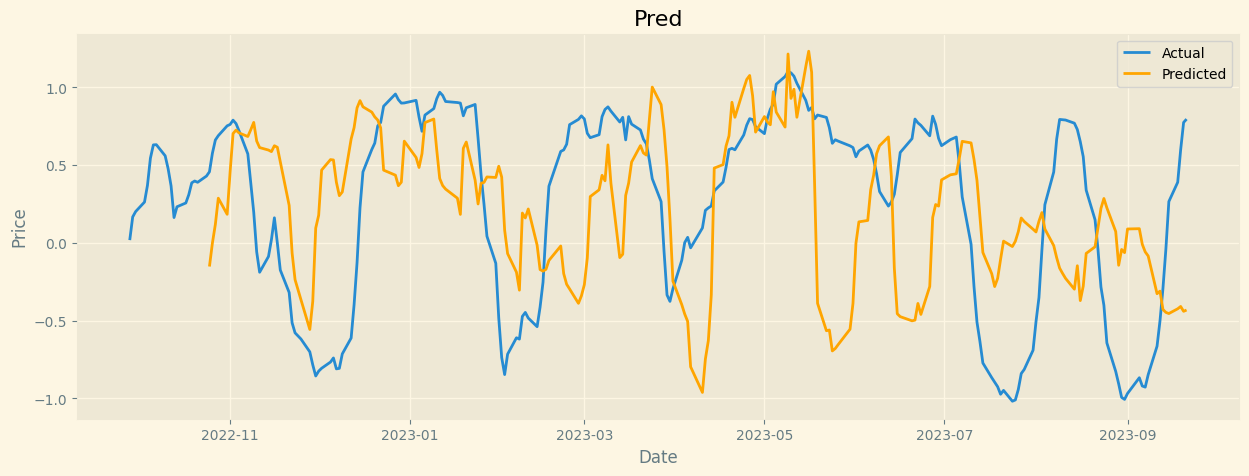

In [2]:
model = tf.keras.models.Sequential([
        tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(None, 4)), # where 2 is the number of features
        tf.keras.layers.LSTM(32),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(1),
        ]
    )

# model.save_weights(f'{Env.PROJECT_ROOT}/models_trained/keep/my_model_weights.h5')
grid_search_service = TFMTS(model, config)
grid_search_service.grid_search(logger, verbose=True)